<a href="https://colab.research.google.com/github/zelda2333/LITS-Unet/blob/master/nii_writer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import SimpleITK as sitk
import h5py

images = []
masks = []

# 存储的nii 文件夹路径
ct_dir = "..//Ct"
ct_seg_dir = "..//Segmentation"

# h5文件路径为：
outputPath = "./demo.h5"

if os.path.exists(outputPath):
    raise ValueError("The supplied 'outputPath' already"
                     "exists and cannot be overwritten. Manually delete"
                     "the file before continuing", outputPath)

# 列出ct文件夹下的所有文件，并且按照文件名序号排序
ct_filenames = os.listdir(ct_dir)
ct_filenames.sort()

ct_seg_filenames = os.listdir(ct_seg_dir)
ct_seg_filenames.sort()

for idx in range(len(ct_filenames)):
    ct = sitk.ReadImage(os.path.join(ct_dir, ct_filenames[idx]), sitk.sitkInt16)
    ct_array = sitk.GetArrayFromImage(ct)

    ct_seg = sitk.ReadImage(os.path.join(ct_seg_dir, ct_seg_filenames[idx]), sitk.sitkFloat32)
    ct_seg_array = sitk.GetArrayFromImage(ct_seg)
    for i in range(len(ct_array)):
        image = ct_array[i][np.newaxis, :, :, np.newaxis]
        images.extend(image)
        image_seg = ct_seg_array[i][np.newaxis, :, :, np.newaxis]
        masks.extend(image_seg)

print(np.shape(images))
print(np.shape(masks))
db = h5py.File(outputPath, "w")
# 创建名为images和masks的dataset
data = db.create_dataset("images", data=images, compression="gzip", dtype="float")
masks = db.create_dataset("masks", data=masks,  compression="gzip", dtype="int")
db.close()

(204, 512, 512, 1)
(204, 512, 512, 1)


In [0]:
# 访问的方法
# 读取h5py文件
data = h5py.File('./demo.h5', 'r')
# 访问的方式类似于字典，通过key来访问值

# 查看 images 的长度
print(data['images'].shape[0])

data.close()

204


C:\Users\River\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


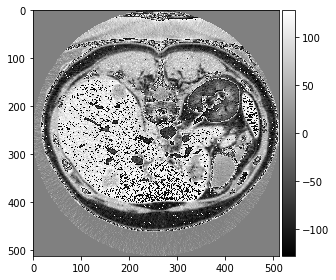

In [0]:
import skimage
def show_img(ori_img):
    skimage.io.imshow(ori_img, cmap = 'gray')
    skimage.io.show()

# 读取其中一张图片并显示
import matplotlib.pyplot as plt
# 读取文件
data = h5py.File('./demo.h5', 'r')

# 获取其中一张图片(第156张照片)
img_arr = data['images'][155]
img = img_arr.reshape(512,512)

show_img(img)

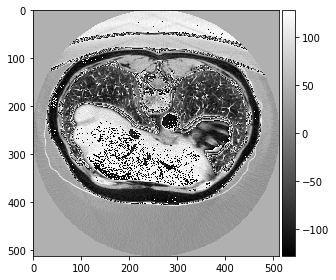

In [0]:
# 获取其中一张图片(第69张照片)
img_arr = data['images'][68]
img = img_arr.reshape(512,512)

show_img(img)